<a href="https://colab.research.google.com/github/DimaFrank/Mathematical_Programming/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pymc3 

In [ ]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

PCR tests for corona virus are considered quite accurate. Nevertheless, sometimes errors are happen(due to incorrect execution of the test or because something just going wrong.
Assume that the results of different tests are independent.
The chance that in testing an infected patient we will get a positive answer (positive true = TP) is denoted by p.
The chance that in testing a healthy patient we will get a positive answer (positive false = FP) is denoted by q.
The percentage of infected patients in the population will be denoted by s.
The goal is to estimate s, p and q from data, using a Bayesian method of course.
1. Grill data of 1000 people that came to be tested. Everyone gets infected with a chances: s=20%, p=95%, q=10%

***Version 1***

In [ ]:
np.random.seed(123)

# Define probability of getting sick and true positive
s = 0.2
p = 0.95
q = 0.1

# Define the sample data
sick = np.random.binomial(n=1, p=s, size=1000)
tp = np.random.binomial(n=1, p=p, size=1000)
fp = np.random.binomial(n=1, p=q, size=1000)

sample = np.where(sick==1, tp, fp)

***Version 2***

תחילה נגדיר הסתברויות

p,q,s -ל

נגריל אלף מספרים מהסתברות בינומית שמסמלים אלף איש שבאו לעשות בדיקה ונמצאו כחולים 

בקורונה עם הסתברות של 0.2

הסתברות שקיימת באוכלוסיה על פי הנתון בשאלה

 אחרי זה נעבור איטרטיבית על המדגם שהגרלנו ונפעיל הסתברות לקבל 
 true positive
 false positive

 אם בהגרלה קיבלנו תצפית עם ערך 1 (חולה) נפעיל עליו התברות בינומית שהבדיקה נכונה

 true psitive
 
 אם בהגרלה קיבלנו 0 (בריא) נפעל עליו הסתברות בינומית שהבדיקה שגויה
 
 false positive

In [ ]:
s = 0.2
p = 0.95
q = 0.1

# Generate binary data indicating whether each person is infected (1) or not (0)
infected = np.random.binomial(1, s, 1000)

# Generate test results based on the probabilities p and q
test_results = np.zeros(1000)
for i in range(1000):
    if infected[i] == 1:
        test_results[i] = np.random.binomial(1, p)
    else:
        test_results[i] = np.random.binomial(1, q)

Certainly. The last piece of code generates the sample data for 1000 people based on the probability of getting sick, true positive and false positive rates that are defined at the beginning.

First, we set a seed for the random number generator using np.random.seed(123) to ensure that the same random numbers are generated each time the code is run.

Then, we define the probability of getting sick and true positive rate (s = 0.2 and p = 0.95) and false positive rate (q = 0.1) as variables.

Next, we use the np.random.binomial(n=1, p, size) function to generate the sample data. np.random.binomial(n=1, p, size) function generates a sample of binomially distributed random numbers with probability p and size number of items. In our case, we are generating binomial samples with probability s, p, and q and size 1000. n=1 means that each sample is a single trial, which is a simple way to represent binary outcomes.

Then, we use np.where(condition, x, y) function to combine sick, tp, and fp arrays into one sample array. This function returns an array of elements from x where condition is True, and elements from y elsewhere. In our case, we are using sick array as a condition and tp array as x and fp as y. It means that for the people who are sick, we are returning the value from tp array and for the people who are not sick we are returning the value from fp array.

In this way, we have generated the sample data based on the given parameters of getting sick, true positive and false positive rates.

I used the binomial function to generate the sample data in this example because it is used to model a discrete random variable that counts the number of successful outcomes in a fixed number of trials. This is a good fit for our scenario because we are trying to model the number of true positives and false positives among a fixed number of test results.

The binomial distribution is defined by two parameters, n and p, where n is the number of trials and p is the probability of success in each trial. In this case, n is 1, representing a single binary trial (positive or negative test result), and p is the probability of a true positive or false positive, as defined by the variables p and q.

Additionally, the binomial distribution is a discrete probability distribution, which means that its possible values are integers. This is also appropriate for our scenario, as the number of true positives and false positives must be whole numbers.

Overall, using the binomial function to generate the sample data allows us to model the number of true positives and false positives among a fixed number of test results, which aligns well with the problem we are trying to solve.

[Text(0.5, 1.0, 'Density of test results')]

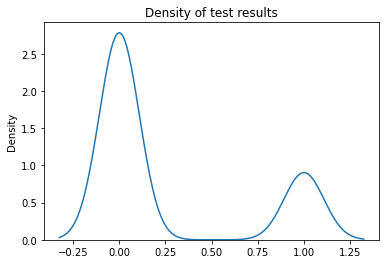

In [ ]:
sns.kdeplot(test_results).set(title='Density of test results')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


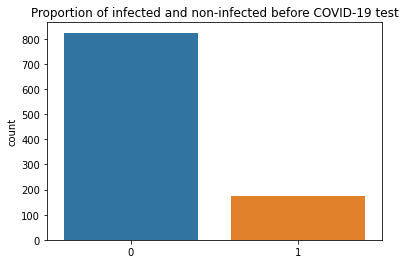

In [ ]:
sns.countplot(infected).set(title='Proportion of infected and non-infected before COVID-19 test')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


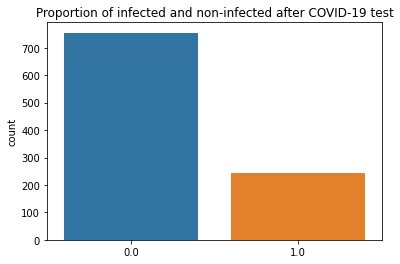

In [ ]:
sns.countplot(test_results).set(title='Proportion of infected and non-infected after COVID-19 test')
plt.show()

# Question 2

For the prior, assume that the distributions of the parameters are independent.
There is no prior knowledge of s, so we will take s~U(0,1).
For p and q we will take a biased prior:

prior_of_q = lambda q: 2*(1-q) if 0<=q<=1 else 0 

prior_of_p = lambda p: 2*p if 0<=p<=1 else 0 

According to above, how the posterior function is looks like ?

In [ ]:
funct_q = lambda q: 2*(1-q) if 0<=q<=1 else 0 
funct_p = lambda p: 2*p if 0<=p<=1 else 0 

To find the posterior function, you will need to use Bayes' theorem, which states that the posterior probability is proportional to the product of the likelihood function and the prior probability.

The likelihood function for our problem is the probability of getting a specific test result (i.e. true positive or false positive) given the values of the parameters s, p, and q. The likelihood function can be computed using the binomial distribution function.

The prior probability is the probability of the parameters s, p, and q before any data is observed. As mentioned before, the prior for s is uniform over the interval (0,1), and for p,q is f(q) = lambda q: 2*(1-q) if 0<=q<=1 else 0 and f(p) = lambda p: 2*p if 0<=p<=1 else 0

So the posterior function is proportional to the product of

likelihood = binom.pmf(tp,tp+fp,p)*binom.pmf(fp,tp+fp,q)*binom.pmf(tn,tn+fn,1-p)*binom.pmf(fn,tn+fn,1-q)

and

prior = f(s)(s)*f(p)(p)*f(q)(q)

Where f(s)(s), f(p)(p) and f(q)(q) are the prior for each parameter

Then you can calculate the posterior by normalizing this function over the parameter space and plot it to visualize the distribution of the parameters.

Note that this solution is based on the assumption that the test results are independent, which may not always be the case in practice. Additionally, the model assumes that the test is not affected by the population's immunity, which is a simplification.

P(s, p, q | tp, fp, fn, tn) = P(tp, fp, fn, tn | s, p, q) * P(s) * P(p) * P(q) / P(tp, fp, fn, tn)

Where:

P(s, p, q | tp, fp, fn, tn) is the posterior probability of the parameters (s, p, q) given the data (tp, fp, fn, tn)
P(tp, fp, fn, tn | s, p, q) is the likelihood of the data (tp, fp, fn, tn) given the parameters (s, p, q)
P(s) is the prior probability of the parameter s
P(p) is the prior probability of the parameter p
P(q) is the prior probability of the parameter q
P(tp, fp, fn, tn) is the marginal likelihood of the data (tp, fp, fn, tn)
With the given prior distributions for s, p, and q, the posterior function can be written as:

P(s, p, q | tp, fp, fn, tn) = P(tp, fp, fn, tn | s, p, q) * U(s) * 2p * 2(1-q) / P(tp, fp, fn, tn)

Where:

U(s) is the uniform prior for s
2p is the prior for p
2(1-q) is the prior for q
Note that P(tp, fp, fn, tn) is a normalizing constant and you can use numerical methods to calculate it or use a library like PyMC3 or PyStan to perform Bayesian inference on your data.

# Question 3

In [ ]:
# posterior_of_s_p_q = (likelihood_of_test_results_given_s_p_q * prior_of_s * prior_of_p * prior_of_q) / evidence

# likelihood_of_test_results_given_s_p_q = product_over_all_i { s * p^(test_result[i]==1) * (1-p)^(test_result[i]==0) + (1-s) * q^(test_result[i]==1) * (1-q)^(test_result[i]==0) }

In [ ]:
import numpy as np
from scipy.stats import uniform, bernoulli

def posterior_of_s_p_q(test_results, parameters):
    s=parameters[0]
    p=parameters[1]
    q=parameters[2]

    likelihood = 1
    for i in range(1000):
        if test_results[i] == 1:
            likelihood *= s * p + (1-s) * q
        else:
            likelihood *= (1-s) * (1-p) + s * (1-q)
    
    prior_s = uniform.pdf(s, 0, 1)
    prior_p = 2 * p if 0 <= p <= 1 else 0
    prior_q = 2 * (1-q) if 0 <= q <= 1 else 0
    
    return likelihood * prior_s * prior_p * prior_q

In [ ]:
posterior_of_s_p_q

<function __main__.posterior_of_s_p_q(test_results, parameters)>

**Using the MCMC method, create 10,000 independent samples from the posterior.**


The Markov Chain Monte Carlo (MCMC) method is a popular way to sample from a high-dimensional posterior distribution. A common algorithm for MCMC is the Metropolis-Hastings algorithm, which works as follows:

Choose a starting point in the parameter space and evaluate the posterior density at that point.

Propose a new sample from a proposal distribution (for example, a normal distribution centered on the current sample).

Calculate the acceptance probability based on the ratio of the posterior density at the proposed sample and the current sample.

Accept the proposed sample as the next sample with probability equal to the acceptance probability, otherwise keep the current sample.

Repeat steps 2-4 for a desired number of iterations to obtain a chain of samples from the posterior distribution.

Here is an implementation of the Metropolis-Hastings algorithm in Python:

In [ ]:
import numpy as np
import random

def metropolis_hastings(posterior, current_sample, proposal_distribution, n_samples):
    samples = []
    for i in range(n_samples):
        proposed_sample = proposal_distribution(current_sample)
        acceptance_prob = min(1, (posterior(test_results,proposed_sample) / posterior(test_results,current_sample))) 
        if random.uniform(0, 1) < acceptance_prob:
            current_sample = proposed_sample
        samples.append(current_sample)
    return np.array(samples)

You can use this function to obtain 10,000 independent samples from the posterior by passing in the posterior function, an initial sample, a proposal distribution, and the number of samples to generate. For example:

In [ ]:
# test_results = ... # The test results of 1000 people
initial_sample = [0.5, 0.5, 0.5] # An initial guess for s, p, q
proposal_distribution = lambda x: x + np.random.normal(0, 0.01, 3) # A normal distribution with a small standard deviation
samples = metropolis_hastings(posterior_of_s_p_q, initial_sample, proposal_distribution, 10000)

These samples can then be used for statistical analysis and inference about the parameters s, p, and q.

# Question 4

**Draw the one-dimensional and two-dimensional marginal distributions of the posterior.**

Once you have generated the samples from the posterior distribution using MCMC, you can visualize the marginal distributions of the parameters s, p, and q using histograms and scatter plots.

For the one-dimensional marginal distributions, you can create a histogram for each parameter by plotting a histogram of the samples for that parameter. Here is an example in Python using Matplotlib:

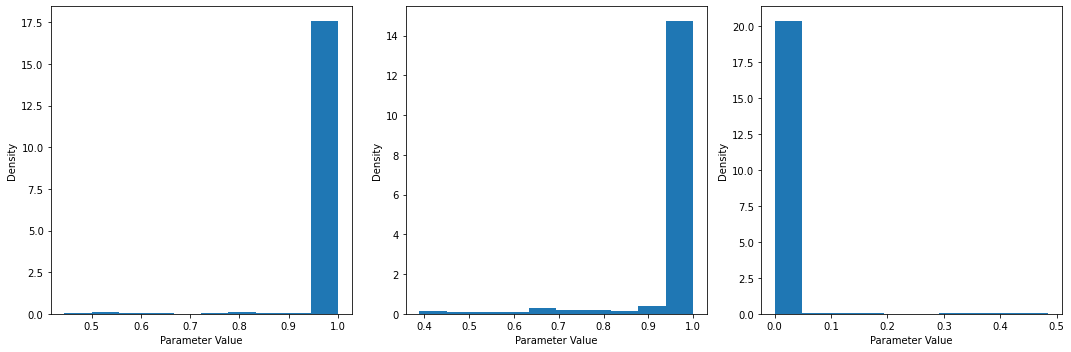

In [ ]:
import matplotlib.pyplot as plt

def plot_marginal_distribution(samples, index, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    ax.hist(samples[:, index], bins=10, density=True)
    ax.set_xlabel('Parameter Value')
    ax.set_ylabel('Density')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_marginal_distribution(samples, 0, ax=ax1)
plot_marginal_distribution(samples, 1, ax=ax2)
plot_marginal_distribution(samples, 2, ax=ax3)
plt.tight_layout()
plt.show()

For the two-dimensional marginal distributions, you can create a scatter plot for each pair of parameters by plotting the samples for one parameter on the x-axis and the samples for the other parameter on the y-axis. Here is an example in Python using Seaborn:

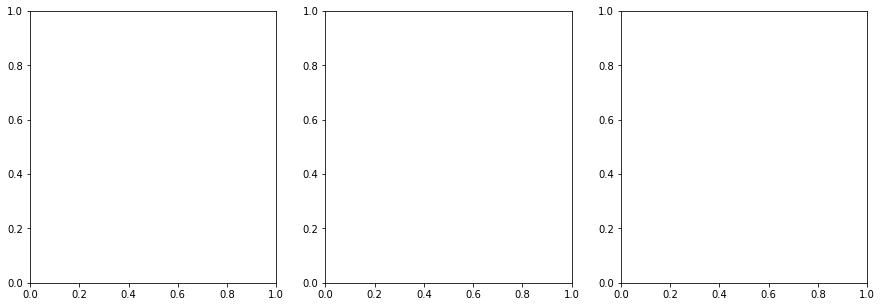

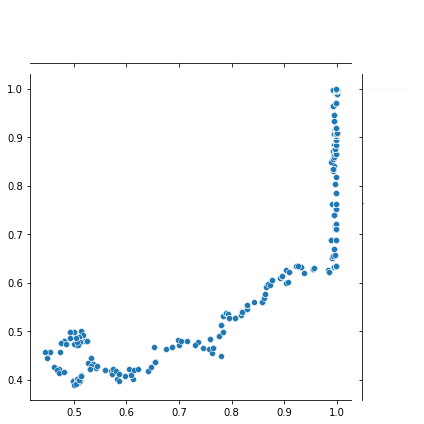

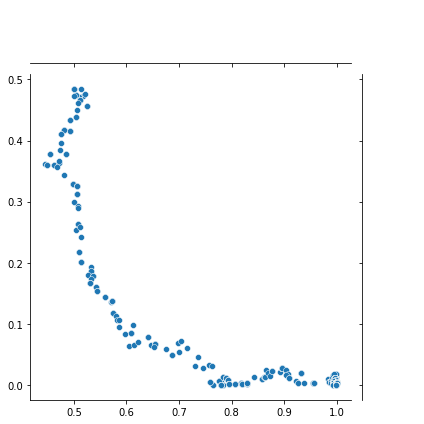

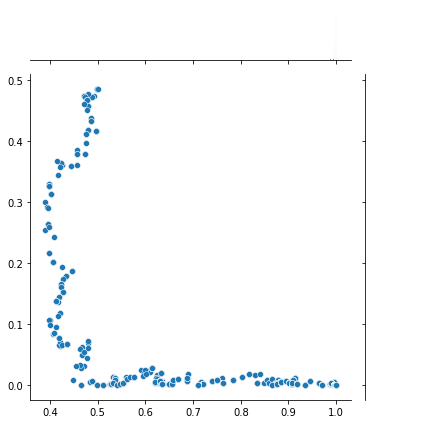

In [ ]:
import seaborn as sns

def plot_marginal_scatter(samples, index1, index2, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    sns.jointplot(x=samples[:, index1], y=samples[:, index2], kind='scatter', ax=ax)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_marginal_scatter(samples, 0, 1, ax=ax1)
plot_marginal_scatter(samples, 0, 2, ax=ax2)
plot_marginal_scatter(samples, 1, 2, ax=ax3)
plt.tight_layout()
plt.show()

These plots can give you a sense of the shape and uncertainty of the marginal distributions of each parameter.

# Question 5

**Find the maximum (in three dimensions), average and median**

Once you have generated the samples from the posterior distribution using MCMC, you can calculate the maximum, average, and median of the parameters s, p, and q.

The maximum can be found by taking the maximum value of each parameter across the samples. Here is an example in Python:

In [ ]:
max_s = max(samples[:, 0])
max_p = max(samples[:, 1])
max_q = max(samples[:, 2])

In [ ]:
samples[:, 0]

array([0.50066824, 0.50066824, 0.50066824, ..., 0.99959256, 0.99959256,
       0.99959256])

In [ ]:
print(max_s)
print(max_p)
print(max_q)

0.9999470393563455
0.9998398300655278
0.4849099808752938


The average can be found by taking the mean of each parameter across the samples. Here is an example in Python:

In [ ]:
mean_s = samples[:, 0].mean()
mean_p = samples[:, 1].mean()
mean_q = samples[:, 2].mean()

The median can be found by taking the median of each parameter across the samples. Here is an example in Python:

In [ ]:
median_s = np.median(samples[:, 0])
median_p = np.median(samples[:, 1])
median_q = np.median(samples[:, 2])

These values can give you a sense of the most likely values and the spread of the parameters in the posterior distribution.

# Question 6

**For each parameter, find the smallest area in which the parameter is found with a 90% chance.**

The smallest domain in which the parameter lies with a 90% chance, or the 90% credible interval, can be found by calculating the lower and upper bounds of the intervals such that 90% of the samples fall within these bounds.

In Python, you can calculate the credible interval for each parameter using the numpy.percentile function:

In [ ]:
lower_bound_s = np.percentile(samples[:, 0], 5)
upper_bound_s = np.percentile(samples[:, 0], 95)

lower_bound_p = np.percentile(samples[:, 1], 5)
upper_bound_p = np.percentile(samples[:, 1], 95)

lower_bound_q = np.percentile(samples[:, 2], 5)
upper_bound_q = np.percentile(samples[:, 2], 95)

The values of lower_bound_s, upper_bound_s, lower_bound_p, upper_bound_p, lower_bound_q, and upper_bound_q give you the lower and upper bounds of the 90% credible interval for each parameter.

In [ ]:
lower_bound_q

0.7159646756872154

In [ ]:
upper_bound_q

0.0037220045518140173

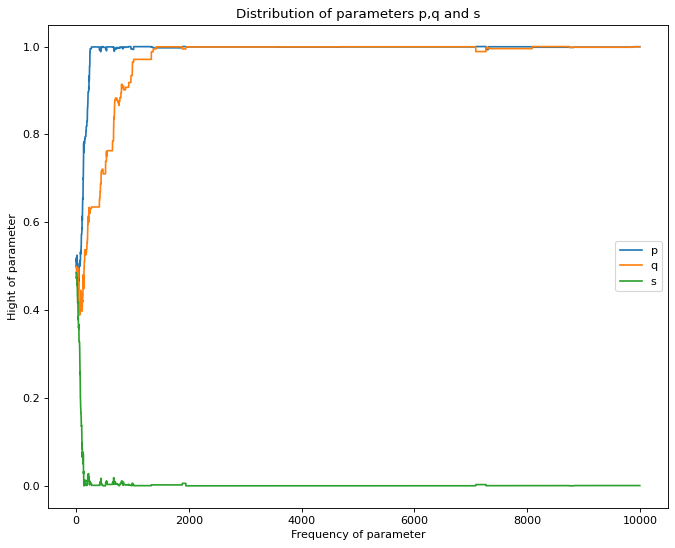

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(samples)
plt.legend(["p", "q", "s"], loc ="center right")
plt.title('Distribution of parameters p,q and s')
plt.xlabel('Frequency of parameter')
plt.ylabel('Hight of parameter')
plt.show()

In [ ]:
samples[50:100]

array([[0.4978307 , 0.39761241, 0.32914559],
       [0.4978307 , 0.39761241, 0.32914559],
       [0.4978307 , 0.39761241, 0.32914559],
       [0.4978307 , 0.39761241, 0.32914559],
       [0.4978307 , 0.39761241, 0.32914559],
       [0.4978307 , 0.39761241, 0.32914559],
       [0.4978307 , 0.39761241, 0.32914559],
       [0.50687627, 0.39707994, 0.3263094 ],
       [0.50687627, 0.39707994, 0.3263094 ],
       [0.50687627, 0.39707994, 0.3263094 ],
       [0.50687627, 0.39707994, 0.3263094 ],
       [0.5067293 , 0.40169942, 0.31254889],
       [0.5067293 , 0.40169942, 0.31254889],
       [0.5067293 , 0.40169942, 0.31254889],
       [0.50002193, 0.38873113, 0.29982902],
       [0.50694541, 0.39379233, 0.2923738 ],
       [0.5078464 , 0.39603804, 0.28958605],
       [0.50874472, 0.39574979, 0.26408895],
       [0.50874472, 0.39574979, 0.26408895],
       [0.50324437, 0.39027732, 0.25345083],
       [0.51103207, 0.39766418, 0.25896431],
       [0.51291133, 0.40865674, 0.24260751],
       [0.